In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('scores.csv')
df.tournament.unique()

# FIXME: ensure that 'Adjudicator X' names are not unintenionally merged between tournaments

array(['wudc2023', 'wudc2024', 'wudc2025', 'stockholmopen2025',
       'wudc2020'], dtype=object)

## Analyse data

In [47]:
by_adj = df.groupby('adj')

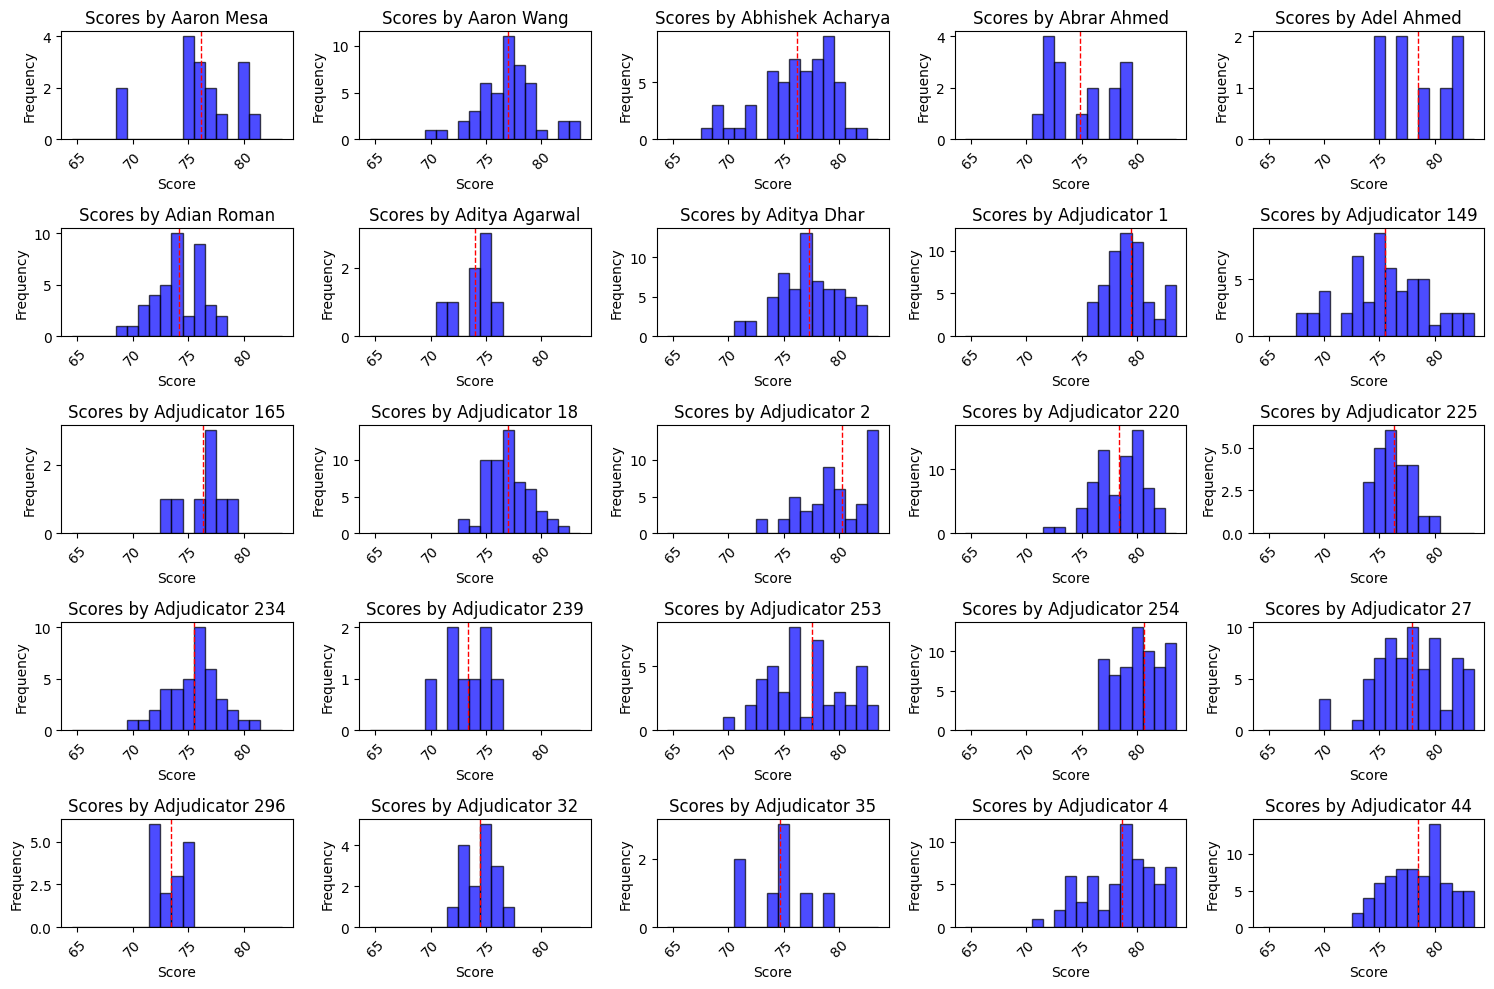

In [48]:
bp_bins = np.arange(65, 85, 1)

n = 5
# Group by adjudicator and plot histogram of scores
fig, axs = plt.subplots(n, n, figsize=(15, 10))
axs = axs.ravel() # Flatten the 2D array of axes for easy iteration

# Group by adjudicator
grouped_by_adj = df.groupby('adj')

for i, (judge, group) in enumerate(grouped_by_adj):
    if i >= len(axs):
        break
    
    ax = axs[i]
    ax.hist(group['score'], alpha=0.7, color='blue', bins=bp_bins, align='left', edgecolor='black')
    ax.axvline(group['score'].mean(), color='red', linestyle='dashed', linewidth=1)
    ax.set_title(f'Scores by {judge}')
    # ax.set_xticks(bp_bins)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

[]

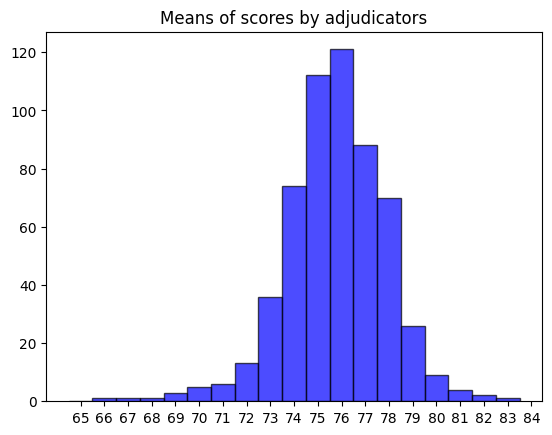

In [49]:
means = by_adj['score'].mean()
plt.hist(means, alpha=0.7, color='blue', bins=bp_bins, align='left', edgecolor='black')
plt.title('Means of scores by adjudicators')
plt.xticks(bp_bins)
plt.plot()

[]

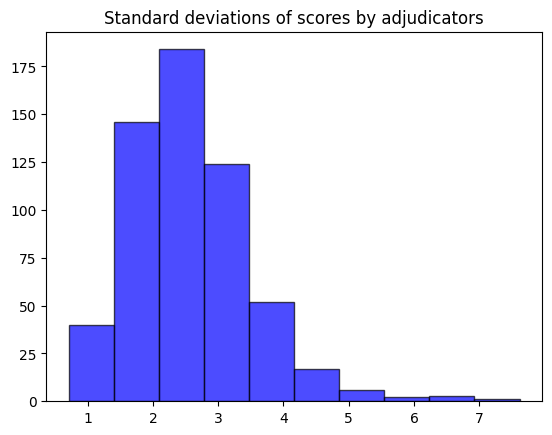

In [50]:
stds = by_adj['score'].std()
plt.title('Standard deviations of scores by adjudicators')
plt.hist(stds, alpha=0.7, color='blue', edgecolor='black')
plt.plot()

[]

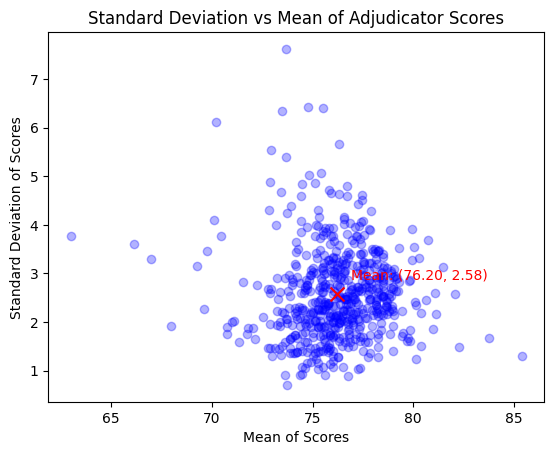

In [51]:
plt.scatter(means, stds, alpha=0.3, color='blue')
plt.xlabel('Mean of Scores')
plt.ylabel('Standard Deviation of Scores')
# Calculate the mean of means and mean of standard deviations
mean_of_means = means.mean()
mean_of_stds = stds.mean()
# Add a cross marker at the mean point
plt.scatter(mean_of_means, mean_of_stds, color='red', marker='x', s=100)
# Add text annotation
plt.annotate(f'Mean: ({mean_of_means:.2f}, {mean_of_stds:.2f})', 
             (mean_of_means, mean_of_stds),
             xytext=(10, 10),
             textcoords='offset points',
             color='red')
plt.title('Standard Deviation vs Mean of Adjudicator Scores')

plt.plot()

In [65]:
aggregate = by_adj['score'].aggregate(['mean', 'std', 'count'])
px.scatter(aggregate, x='mean', y='std', hover_name=aggregate.index, size=aggregate['count'], title='Standard deviation vs mean of scores by adjudicators', height=800)

In [53]:
df[df['adj'] == 'Sharon Wang']

,tournament,round,score,speaker,adj
7672,wudc2024,6,60.0,Đặng Thế Bảo,Sharon Wang
7673,wudc2024,6,55.0,Võ Thiên Phúc,Sharon Wang
7674,wudc2024,6,63.0,Ichiko,Sharon Wang
7675,wudc2024,6,64.0,Fabiano Youdi Pascalis Salettia,Sharon Wang
7676,wudc2024,6,66.0,Kathleen,Sharon Wang
7677,wudc2024,6,66.0,Coffee,Sharon Wang
7678,wudc2024,6,65.0,Farim Ahsan,Sharon Wang
7679,wudc2024,6,65.0,Farim Ahsan,Sharon Wang


In [ ]:
df[df['adj'] == 'Benjamin Schwarz']

tournament    24
round         24
score         24
speaker       21
adj           24
dtype: int64